In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/Customer_Subscription_And_Transaction_Details.csv')
df

,cust_id,transaction_type,transaction_date,subscription_type,subscription_price,customer_gender,age_group,customer_country,referral_type
0,1,initial,2020-09-01,BASIC,33,Male,35-44,Denmark,Google Ads
1,2,initial,2022-03-01,BASIC,53,Female,18-24,Denmark,facebook
2,3,initial,2020-10-01,MAX,99,Female,25-34,Norway,facebook
3,3,REDUCTION,2022-02-01,BASIC,53,Female,25-34,Norway,facebook
4,4,initial,2022-05-01,PRO,85,Male,18-24,Sweden,Display
...,...,...,...,...,...,...,...,...,...
18101,10364,UPGRADE,2022-09-01,MAX,119,Female,45-54,Norway,facebook
18102,10365,initial,2021-05-01,PRO,75,Male,55-65,Norway,Google Ads
18103,10365,REDUCTION,2021-07-01,BASIC,43,Male,55-65,Norway,Google Ads
18104,10366,initial,2021-01-01,BASIC,43,Male,18-24,Denmark,facebook


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18106 entries, 0 to 18105
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   cust_id             18106 non-null  int64 
 1   transaction_type    18106 non-null  object
 2   transaction_date    18106 non-null  object
 3   subscription_type   18106 non-null  object
 4   subscription_price  18106 non-null  int64 
 5   customer_gender     18106 non-null  object
 6   age_group           18106 non-null  object
 7   customer_country    18106 non-null  object
 8   referral_type       18106 non-null  object
dtypes: int64(2), object(7)
memory usage: 1.2+ MB


## 📊 범주형(Categorical) 데이터 시각화

In [ ]:
referral_val = df['referral_type'].unique().tolist()
referral_val.sort()

unknown_index = referral_val.index('Unknown')
referral_val[-1], referral_val[unknown_index] = referral_val[unknown_index], referral_val[-1]

In [8]:
subscription_val = ['BASIC', 'PRO', 'MAX']

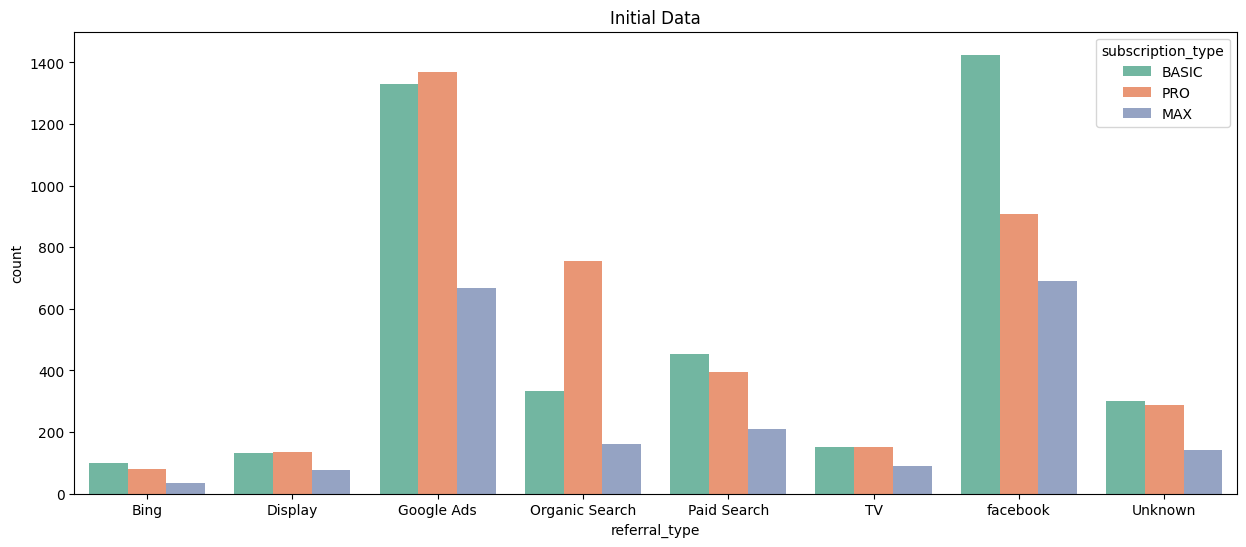

In [9]:
## 진입 경로에 따른 초기 사용자의 구독 플랜 타입
init_df = df[(df.transaction_type=='initial')]

plt.figure(figsize=(15, 6))
plt.title('Initial Data')
sns.countplot(x='referral_type', hue='subscription_type', order=referral_val, hue_order=subscription_val,
              data=init_df, palette='Set2')
plt.ylim([0, 1500])
plt.show()

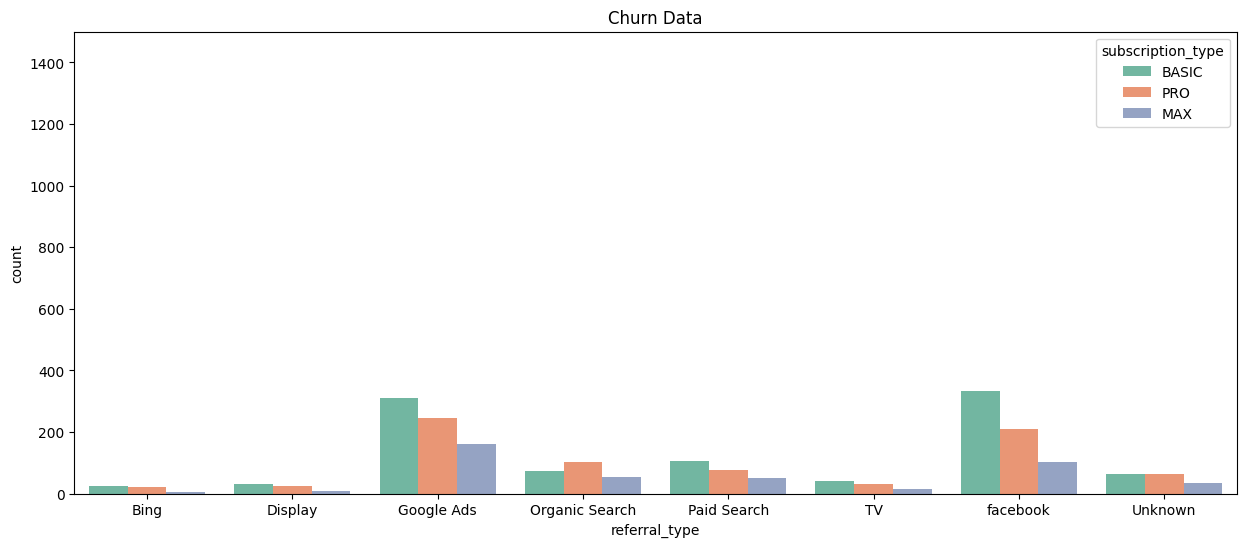

In [10]:
## 진입 경로에 따른 종료 사용자의 구독 플랜 타입
curn_df = df[(df.transaction_type=='CHURN')]

plt.figure(figsize=(15, 6))
plt.title('Churn Data')
sns.countplot(x='referral_type', hue='subscription_type', order=referral_val, hue_order=subscription_val,
              data=curn_df, palette='Set2')
plt.ylim([0, 1500])
plt.show()

## 📈 수치형(numeric) 데이터 시각화
* period 컬럼 데이터 사용



In [11]:
df = pd.read_csv('/content/period_add_dataset.csv')
df

,cust_id,transaction_date,subscription_price,subscription_type_BASIC,subscription_type_MAX,subscription_type_PRO,customer_country_Denmark,customer_country_Finland,customer_country_Norway,customer_country_Sweden,...,referral_type_TV,referral_type_Unknown,referral_type_facebook,age_group_18-24,age_group_25-34,age_group_35-44,age_group_45-54,age_group_55-65,period,churn_result
0,1,2020-09-01,33,True,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,28,False
1,2,2022-03-01,53,True,False,False,True,False,False,False,...,False,False,True,True,False,False,False,False,10,False
2,3,2020-10-01,99,False,True,False,False,False,True,False,...,False,False,True,False,True,False,False,False,27,False
3,3,2022-02-01,53,True,False,False,False,False,True,False,...,False,False,True,False,True,False,False,False,11,False
4,4,2022-05-01,85,False,False,True,False,False,False,True,...,False,False,False,True,False,False,False,False,8,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17958,10364,2022-09-01,119,False,True,False,False,False,True,False,...,False,False,True,False,False,False,True,False,4,False
17959,10365,2021-05-01,75,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,True,20,False
17960,10365,2021-07-01,43,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,18,False
17961,10366,2021-01-01,43,True,False,False,True,False,False,False,...,False,False,True,True,False,False,False,False,13,True


In [ ]:
df['period'].describe()

count    17963.000000
mean        14.176808
std          9.120732
min          1.000000
25%          7.000000
50%         12.000000
75%         20.500000
max         36.000000
Name: period, dtype: float64

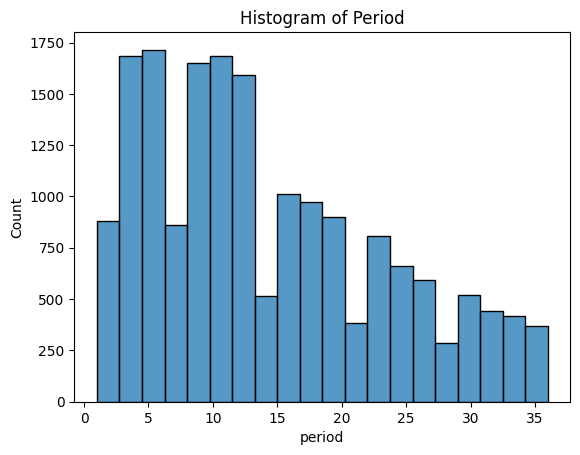

In [ ]:
sns.histplot(data=df, x='period', bins=20)
plt.title('Histogram of Period')
plt.show()

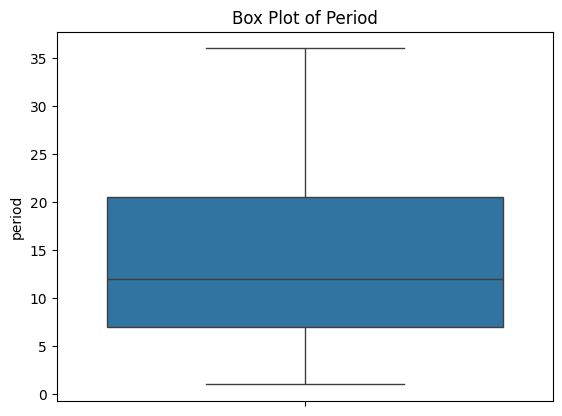

In [ ]:
sns.boxplot(y='period', data=df)
plt.title('Box Plot of Period')
plt.show()

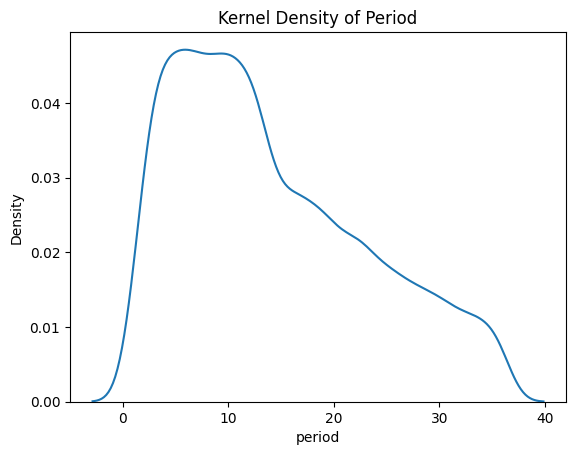

In [ ]:
sns.kdeplot(data=df, x='period')
plt.title('Kernel Density of Period')
plt.show()

## 📉 파생 변수와 target 값 간의 데이터 시각화

* period, churn_result 컬럼 사용

In [15]:
def undummify(df, prefix_sep="_"):
  col2collapse = {item.rsplit(prefix_sep, 1)[0]: prefix_sep in item for item in df.columns}
  series_list = []
  for col, needs_to_collapse in col2collapse.items():
    if needs_to_collapse:
      undummified = (
          df.filter(like=col)
          .idxmax(axis=1)
          .apply(lambda x: x.rsplit(prefix_sep, 1)[1])
          .rename(col)
      )
    else:
      undummified = df[col]
    series_list.append(undummified)

  undummified_df = pd.concat(series_list, axis=1)
  return undummified_df

In [20]:
one_hot_df = df.drop(['cust_id', 'transaction_date', 'subscription_price', 'period', 'churn_result'], axis=1)
result_df = pd.concat([df[['cust_id', 'transaction_date', 'subscription_price']], undummify(one_hot_df), df[['period', 'churn_result']]], axis=1)
result_df

,cust_id,transaction_date,subscription_price,subscription_type,customer_country,transaction_type,customer_gender,referral_type,age_group,period,churn_result
0,1,2020-09-01,33,BASIC,Denmark,initial,Male,Google Ads,35-44,28,False
1,2,2022-03-01,53,BASIC,Denmark,initial,Female,facebook,18-24,10,False
2,3,2020-10-01,99,MAX,Norway,initial,Female,facebook,25-34,27,False
3,3,2022-02-01,53,BASIC,Norway,REDUCTION,Female,facebook,25-34,11,False
4,4,2022-05-01,85,PRO,Sweden,initial,Male,Display,18-24,8,False
...,...,...,...,...,...,...,...,...,...,...,...
17958,10364,2022-09-01,119,MAX,Norway,UPGRADE,Female,facebook,45-54,4,False
17959,10365,2021-05-01,75,PRO,Norway,initial,Male,Google Ads,55-65,20,False
17960,10365,2021-07-01,43,BASIC,Norway,REDUCTION,Male,Google Ads,55-65,18,False
17961,10366,2021-01-01,43,BASIC,Denmark,initial,Male,facebook,18-24,13,True


<Axes: xlabel='churn_result', ylabel='period'>

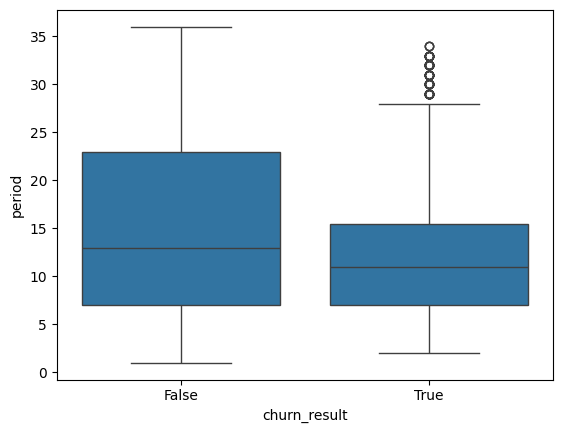

In [21]:
sns.boxplot(x='churn_result', y='period', data=result_df)